In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time # for tensorboard logs

from tensorflow.keras.callbacks import TensorBoard,EarlyStopping # for visualizing our models
from sklearn.model_selection import train_test_split

In [6]:
tf.__version__

'2.15.0'

In [7]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 326.6/589.8 MB 2.0 MB/s eta 0:02:14
ERROR: Operation cancelled by user


In [26]:
tf.__version__

'2.15.0'

In [27]:
df = pd.read_csv('/content/all-data.csv', encoding='latin-1',header=1)
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [28]:
sentiment = df.iloc[:,0]
headline = df.iloc[:,1]

In [29]:
print("Total positive:", len(df[sentiment == 'positive']))
print("Total negative:", len(df[sentiment == 'negative']))
print("Total neutral:", len(df[sentiment == 'neutral']))

Total positive: 1363
Total negative: 604
Total neutral: 2878


In [30]:
headlines = headline
print(type(headlines))
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(headlines)
print(len(tokenizer.word_index)) # 10000 is a reasonable amount of words so we wont set a cap here, too many can slow down the model greatly, so
print(tokenizer.word_index)
sequences = tokenizer.texts_to_sequences(headlines)

<class 'pandas.core.series.Series'>
10122
{'the': 1, 'of': 2, 'in': 3, 'and': 4, 'to': 5, 'a': 6, 'for': 7, 'eur': 8, "'s": 9, 'is': 10, 'will': 11, 'company': 12, 'from': 13, 'on': 14, 'its': 15, 'has': 16, 'with': 17, 'by': 18, 'said': 19, 'as': 20, 'be': 21, 'finnish': 22, 'mn': 23, '1': 24, 'at': 25, 'it': 26, 'sales': 27, 'million': 28, 'that': 29, 'net': 30, 'profit': 31, 'year': 32, 'was': 33, 'm': 34, 'finland': 35, '2': 36, '5': 37, '3': 38, 'an': 39, 'group': 40, '2009': 41, 'operating': 42, '2008': 43, '4': 44, 'mln': 45, '0': 46, 'are': 47, 'new': 48, 'business': 49, 'period': 50, 'quarter': 51, '2007': 52, '2010': 53, '6': 54, 'oyj': 55, 'share': 56, '7': 57, '8': 58, 'market': 59, '9': 60, 'also': 61, 'services': 62, '000': 63, 'which': 64, 'have': 65, "''": 66, 'shares': 67, 'first': 68, 'this': 69, 'up': 70, '2006': 71, 'helsinki': 72, 'been': 73, 'euro': 74, 'loss': 75, 'about': 76, 'compared': 77, 'today': 78, 'operations': 79, 'contract': 80, 'nokia': 81, 'mobile': 8

In [31]:
type(sequences)

list

In [32]:
sequences

[[840,
  348,
  5,
  876,
  3,
  1841,
  39,
  193,
  2,
  256,
  1102,
  100,
  292,
  63,
  574,
  1842,
  3,
  125,
  5,
  3497,
  96,
  747,
  3,
  1186,
  575,
  4,
  748,
  1,
  929,
  19],
 [1,
  293,
  655,
  142,
  12,
  336,
  16,
  1284,
  285,
  3498,
  2,
  167,
  13,
  15,
  972,
  279,
  5010,
  5,
  147,
  1502,
  1,
  12,
  2352,
  1,
  5011,
  2,
  15,
  267,
  973,
  1,
  877,
  5012,
  250],
 [17,
  1,
  48,
  88,
  101,
  1,
  12,
  135,
  115,
  15,
  268,
  5,
  1503,
  1,
  154,
  115,
  3,
  478,
  4,
  135,
  656,
  1,
  211,
  2,
  686,
  526,
  4,
  1641,
  115,
  1,
  88,
  1187],
 [95,
  5,
  1,
  12,
  9,
  2353,
  349,
  7,
  1,
  260,
  41,
  1188,
  303,
  1103,
  6,
  218,
  272,
  30,
  27,
  197,
  3,
  1,
  373,
  2,
  150,
  275,
  17,
  39,
  42,
  31,
  508,
  2,
  84,
  150,
  2,
  30,
  27],
 [878,
  2,
  554,
  9,
  197,
  554,
  10,
  5013,
  5014,
  15,
  197,
  349,
  18,
  2354,
  1504,
  14,
  3499,
  116,
  1843,
  5015,
  1505,
  1189,

In [15]:
import pickle
with open('/content/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
lengths = map(lambda x: len(x), sequences)
max_length = np.max(list(lengths))
print(max_length)
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding="post", maxlen=max_length)
print(sequences.shape)
print(sequences)
# check randomly to ensure they are all padded to the correct length
print(len(sequences[66]))
print(len(sequences[77]))

71
(4845, 71)
[[840 348   5 ...   0   0   0]
 [  1 293 655 ...   0   0   0]
 [ 17   1  48 ...   0   0   0]
 ...
 [ 42  31 242 ...   0   0   0]
 [ 30  27   2 ...   0   0   0]
 [ 27   3  35 ...   0   0   0]]
71
71


In [34]:
sentiment_mapping = {
    "negative" : 0,
    "positive" : 1,
    "neutral" : 2
}
# pd.set_option('future.no_silent_downcasting', True)
y = sentiment.replace(sentiment_mapping)

x_train, x_test, y_train, y_test = train_test_split(sequences, y, train_size=0.7, shuffle=True, random_state=1) #change

In [35]:
print(x_train)
print(y_train)

[[  93 1113  113 ...    0    0    0]
 [  22  635  114 ...    0    0    0]
 [   1   12    9 ...    0    0    0]
 ...
 [   1  708   10 ...    0    0    0]
 [4686 2088 1518 ...    0    0    0]
 [  30  615  555 ...    0    0    0]]
545     1
2374    2
3198    2
1071    2
716     1
       ..
2895    2
2763    2
905     1
3980    2
235     1
Name: neutral, Length: 3391, dtype: int64


In [19]:
x_train.shape
y_train.shape

(3391,)

In [20]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))
x = tf.keras.layers.Embedding(
    input_dim=10123,
    output_dim=100
)(inputs)
# on rnn, 18:44
x = tf.keras.layers.GRU(256, activation='tanh', return_sequences=True)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

log_name = 'fINANCIAL-SENTIMENT-RNN-{}-noweights'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(log_name))

model.compile(
    optimizer=tf.optimizers.Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

pos_weight = (1 / 1363) * (4846)/2.0
neg_weight = (1 / 604) * (4846)/2.0
neu_weight = (1 / 2879) * (4846)/2.0 # Scaling by total/2 helps keep the loss to a similar magnitude.

class_weight = {
    0: neg_weight, 1: pos_weight, 2: neu_weight
}

callback1=EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
callback2=EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

In [21]:

class_weight


{0: 4.01158940397351, 1: 1.7776962582538518, 2: 0.8416116707189996}

In [22]:

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=4,
    epochs=50,
    # class_weight=class_weight,
    callbacks=[
        tensorboard,
        callback1,
        callback2,
    ]
)

Epoch 1/50
678/678 [==============================] - 30s 40ms/step - loss: 0.7972 - accuracy: 0.6615 - val_loss: 0.6978 - val_accuracy: 0.7040
Epoch 2/50
678/678 [==============================] - 6s 9ms/step - loss: 0.3217 - accuracy: 0.8743 - val_loss: 0.8225 - val_accuracy: 0.6892
Epoch 3/50
678/678 [==============================] - 5s 7ms/step - loss: 0.0586 - accuracy: 0.9801 - val_loss: 1.2001 - val_accuracy: 0.7054
Epoch 4/50
678/678 [==============================] - 7s 11ms/step - loss: 0.0220 - accuracy: 0.9952 - val_loss: 1.3312 - val_accuracy: 0.6996
Epoch 5/50
678/678 [==============================] - 6s 10ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 1.6362 - val_accuracy: 0.7040
Epoch 6/50
678/678 [==============================] - 5s 7ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 1.8830 - val_accuracy: 0.6878
Epoch 7/50
678/678 [==============================] - 4s 7ms/step - loss: 0.0289 - accuracy: 0.9897 - val_loss: 2.5765 - val_accuracy: 0.6672
Ep

In [23]:
model.evaluate(x_test, y_test)

46/46 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.7448


[0.6482042074203491, 0.7448418140411377]

In [1]:
import matplotlib.pyplot as plt

In [2]:
def PlotAccuracy(net):
  plt.figure(figsize=(10, 4))
  plt.plot(net.history['val_accuracy'],label='Test Accuracy')
  plt.plot(net.history['accuracy'],label='Accuracy')
  plt.title("Train and Test Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('epochs')
  plt.legend()
  plt.plot()

In [38]:
def PlotLoss(net):
  plt.figure(figsize=(10, 4))
  plt.plot(net.history['loss'], label= 'Train Loss')
  plt.plot(net.history['val_loss'], label= 'Test Loss')
  plt.title("Train and Test Loss")
  plt.ylabel('Loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()
  plt.tight_layout()

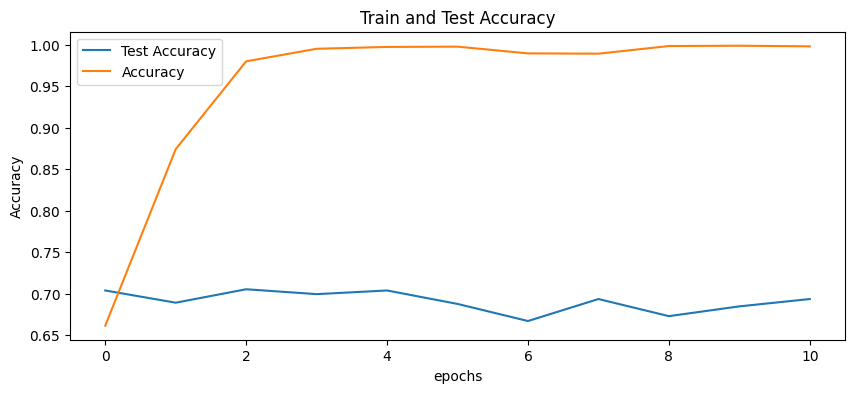

In [39]:
PlotAccuracy(history)

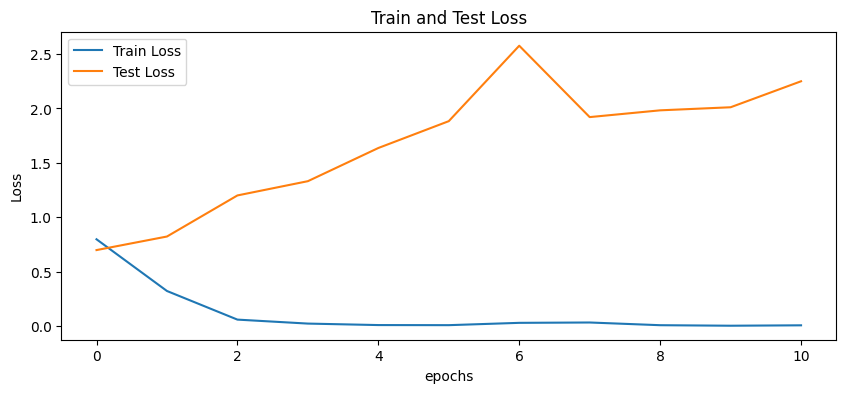

<Figure size 640x480 with 0 Axes>

In [40]:
PlotLoss(history)

In [ ]:
model.save('/content/sentiment_analysis.keras')

In [ ]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))
x = tf.keras.layers.Embedding(
    input_dim=10123,
    output_dim=100
)(inputs)
# on rnn, 18:44
x = tf.keras.layers.GRU(300, activation='relu', return_sequences=True)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model1 = tf.keras.Model(inputs=inputs, outputs=outputs)

log_name = 'fINANCIAL-SENTIMENT-RNN-{}-noweights'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(log_name))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

pos_weight = (1 / 1363) * (4846)/2.0
neg_weight = (1 / 604) * (4846)/2.0
neu_weight = (1 / 2879) * (4846)/2.0 # Scaling by total/2 helps keep the loss to a similar magnitude.

class_weight = {
    0: neg_weight, 1: pos_weight, 2: neu_weight
}

In [ ]:
history1 = model1.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=4,
    epochs=50,
    # class_weight=class_weight,
    validation_data=(x_test,y_test),
    callbacks=[
        tensorboard,
        callback1,
        callback2,
    ]
)

Epoch 1/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.6192 - loss: 0.8771 - val_accuracy: 0.7263 - val_loss: 0.6886
Epoch 2/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.8306 - loss: 0.4286 - val_accuracy: 0.7737 - val_loss: 0.6651
Epoch 3/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9612 - loss: 0.1204 - val_accuracy: 0.7304 - val_loss: 0.9444
Epoch 4/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9887 - loss: 0.0406 - val_accuracy: 0.7448 - val_loss: 1.0458
Epoch 5/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9945 - loss: 0.0200 - val_accuracy: 0.7558 - val_loss: 1.4169
Epoch 6/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9947 - loss: 0.0132 - val_accuracy: 0.7056 - val_loss: 1.4392
Epoch 7/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9967 - loss: 0.0136 - val_accuracy: 0.7359 - val_loss: 1.5457
Epoch 8/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9978 - loss: 0.0062 - 

In [ ]:
model1.evaluate(x_test, y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7689 - loss: 0.6766


[0.6628918051719666, 0.7737276554107666]

In [ ]:
model1.save('/content/sentiment_analysis1.keras')